In [11]:
from scipy.integrate import solve_ivp
from tqdm import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (15, 15)

def draw_preiodic(xp, yp, zp, tspan, p0, filename, charts=[1,1,1,1,1,1], kwargs={}):
    def func(t, arg):
        x, y, z = arg
        return [xp(x, y, z), yp(x, y, z), zp(x, y, z)]
    res = solve_ivp(func, tspan, p0, **kwargs)
    xs, ys, zs = res.y
    if charts[0]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=xs, y=ys)
        plt.savefig(f"{filename}-xy.png", dpi=100)
    if charts[1]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=xs, y=zs)
        plt.savefig(f"{filename}-xz.png", dpi=100)
    if charts[2]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=ys, y=zs)
        plt.savefig(f"{filename}-yz.png", dpi=100)
    if charts[3]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=res.t, y=xs)
        plt.savefig(f"{filename}-xt.png", dpi=100)
    if charts[4]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=res.t, y=ys)
        plt.savefig(f"{filename}-yt.png", dpi=100)
    if charts[5]:
        plt.figure(figsize=figsize)
        sns.scatterplot(x=res.t, y=zs)
        plt.savefig(f"{filename}-zt.png", dpi=100)
    return res.sol

def xp(x, y, z):
    return sigma*(y-x)
def yp(x, y, z):
    return x*(rho-z)-y
def zp(x, y, z):
    return x*y - beta*z

In [ ]:
sigma, rho, beta = 10, 166, 8/3
x0, y0, z0 = 100, 100, -100
tspan = [0, 20]
sol = draw_preiodic(xp, yp, zp, tspan, [x0, y0, z0], "10.4.8-1", charts=[0,1,0,1,0,1], kwargs={"method": "BDF", "dense_output": True})

In [4]:
import math
def f(x, r):
    return r * math.exp(x)

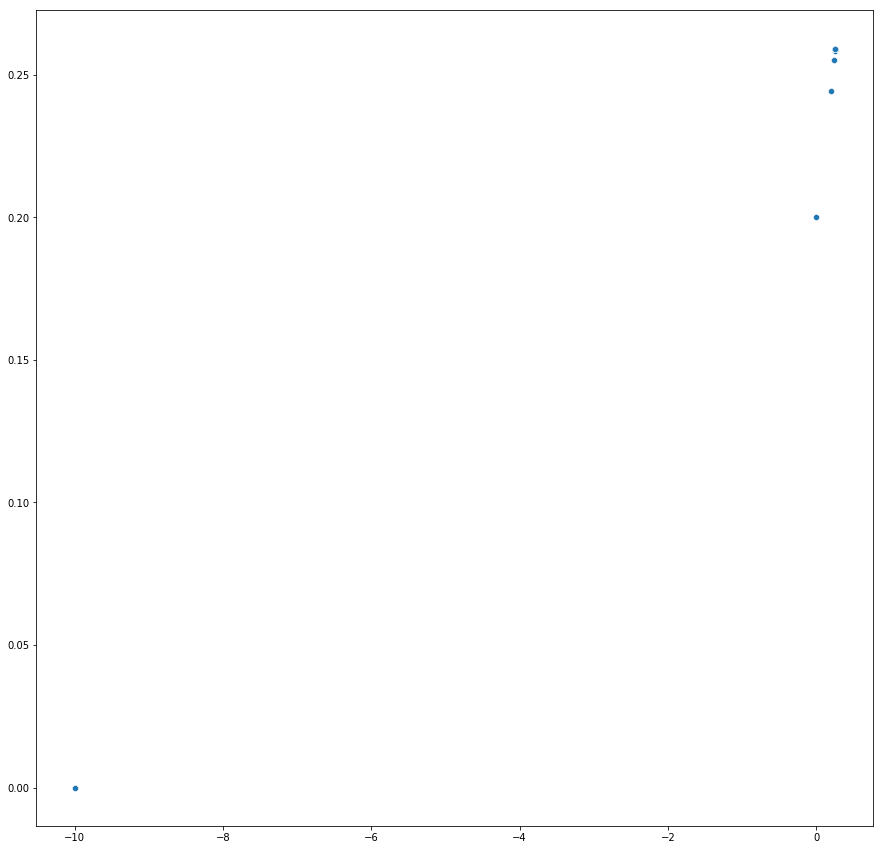

In [18]:
r = 0.2
x = -10
xs = []
ys = []
for _ in range(10000):
    y = f(x, r)
    xs.append(x)
    ys.append(y)
    x = y
plt.figure(figsize=figsize)
sns.scatterplot(x=xs, y=ys)